Implementation of transfer Learning on CIFAR-100 dataset using the ResNet50V2 pre-trained model.

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.losses import sparse_categorical_crossentropy
from keras.applications import vgg19,resnet_v2
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [ ]:
cifar_100 = keras.datasets.cifar100
(x_train,y_train),(x_test,y_test) = cifar_100.load_data()

169017344/169001437 [==============================] - 6s 0us/step


In [ ]:
#x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [ ]:
print((x_train.shape,y_train.shape))
#print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((50000, 32, 32, 3), (50000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
y_train=to_categorical(y_train)
#y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
print((x_train.shape,y_train.shape))
#print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((50000, 32, 32, 3), (50000, 100))
((10000, 32, 32, 3), (10000, 100))


In [ ]:
model2 = keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=(32,32,3))

94683136/94668760 [==============================] - 2s 0us/step


In [ ]:
from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
Model_1 = keras.Sequential()
Model_1.add(model2)
Model_1.add(Flatten())

In [ ]:
for layer in model2.layers:
  if isinstance(layer, BatchNormalization):
    layer.trainable = True
  else:
      layer.trainable = False

In [ ]:
Model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 1, 1, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
Total params: 23,564,800
Trainable params: 45,440
Non-trainable params: 23,519,360
_________________________________________________________________


In [ ]:
Model_1.add(Dense(1024,activation=('relu'))) 
Model_1.add(Dropout(.4))
Model_1.add(BatchNormalization())
Model_1.add(Dense(512,activation=('relu'))) 
Model_1.add(Dropout(.3))
Model_1.add(BatchNormalization())
Model_1.add(Dense(256,activation=('relu')))
Model_1.add(Dropout(.3))
Model_1.add(BatchNormalization())
Model_1.add(Dense(100,activation=('softmax')))

In [ ]:
Model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 1, 1, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                        

In [ ]:
Model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_gen = ImageDataGenerator( rotation_range=30, 
                                    horizontal_flip=True,
                                    zoom_range=.2,
                               shear_range=0.2)


In [ ]:
train_gen.fit(x_train)
#val_gen.fit(x_val)
#test_gen.fit(x_test)

In [ ]:
history = Model_1.fit(train_gen.flow(x_train,y_train,batch_size=100),
                     epochs=80, steps_per_epoch=x_train.shape[0] //100,
                     validation_data=(x_test,y_test))

Epoch 1/80
500/500 [==============================] - 49s 74ms/step - loss: 4.5967 - accuracy: 0.0385 - val_loss: 4.1701 - val_accuracy: 0.0931
Epoch 2/80
500/500 [==============================] - 36s 72ms/step - loss: 4.0467 - accuracy: 0.0871 - val_loss: 3.7854 - val_accuracy: 0.1340
Epoch 3/80
500/500 [==============================] - 36s 72ms/step - loss: 3.7694 - accuracy: 0.1233 - val_loss: 3.5377 - val_accuracy: 0.1664
Epoch 4/80
500/500 [==============================] - 36s 72ms/step - loss: 3.5897 - accuracy: 0.1511 - val_loss: 3.3905 - val_accuracy: 0.1944
Epoch 5/80
500/500 [==============================] - 36s 72ms/step - loss: 3.4650 - accuracy: 0.1737 - val_loss: 3.2405 - val_accuracy: 0.2121
Epoch 6/80
500/500 [==============================] - 36s 72ms/step - loss: 3.3615 - accuracy: 0.1906 - val_loss: 3.1422 - val_accuracy: 0.2298
Epoch 7/80
500/500 [==============================] - 37s 75ms/step - loss: 3.2676 - accuracy: 0.2072 - val_loss: 3.0646 - val_accuracy:

In [ ]:
test_eval = Model_1.evaluate(x_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 2.1303 - accuracy: 0.4546


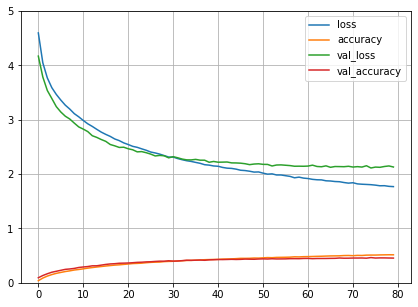

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(7,5))

plt.grid(True)
plt.gca().set_ylim(0,5)
plt.savefig('Finally')

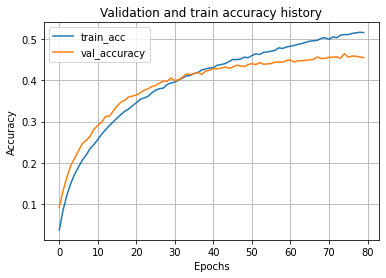

In [ ]:
plt.plot(history.history['accuracy'], label="train_acc")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.title('Validation and train accuracy history')
plt.legend()
plt.grid()
plt.gca()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

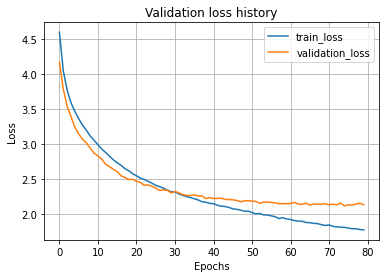

In [ ]:
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="validation_loss")
plt.title('Validation loss history')
plt.legend()
plt.grid()
plt.gca()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

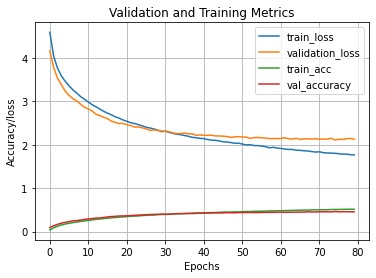

In [ ]:
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="validation_loss")
plt.plot(history.history['accuracy'], label="train_acc")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.title('Validation and Training Metrics')
plt.legend()
plt.grid()
plt.gca()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylabel('Accuracy/loss')
plt.show()

In [ ]:
Model_1.save('TransferCifar100.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
